In [1]:
import os
import matplotlib.pyplot as plt
import sqlalchemy as db
import pandas as pd
password = os.environ.get('DB_PASS')
engine = db.create_engine("postgresql+psycopg2://postgres:"+password+"@/PewlettHackard")
connection = engine.connect()

In [2]:
full_database = pd.read_sql_table('full_database', engine)
full_database.head()

,dept_no,dept_name,emp_no,first_name,last_name,gender,hire_date,from_date,to_date,salary,title
0,d006,Quality Management,10010,Duangkaew,Piveteau,F,1989-08-24,2000-06-26,NaT,72488,Engineer
1,d007,Sales,10016,Kazuhito,Cappelletti,M,1995-01-27,1998-02-11,NaT,70889,Staff
2,d005,Development,10021,Ramzi,Erde,M,1988-02-10,1988-02-10,2002-07-15,55025,Technique Leader
3,d004,Production,10024,Suzette,Pettey,F,1997-05-19,1998-06-14,NaT,83733,Assistant Engineer
4,d004,Production,10044,Mingsen,Casley,F,1994-05-21,1994-05-21,NaT,40919,Technique Leader


In [3]:
full_database['salary'] = full_database['salary'].astype('float')
full_database.dtypes

dept_no               object
dept_name             object
emp_no                object
first_name            object
last_name             object
gender                object
hire_date     datetime64[ns]
from_date     datetime64[ns]
to_date       datetime64[ns]
salary               float64
title                 object
dtype: object

In [4]:
salary_mean = full_database.groupby(['title'])['salary'].mean()
employee_title_mean = full_database.groupby(['title'])['emp_no'].count()

In [5]:
employee_title_mean_df = pd.DataFrame(employee_title_mean)
employee_title_mean_df = employee_title_mean_df.reset_index()
employee_title_mean_df.columns = ['Title','Employee Count']
employee_title_mean_df

,Title,Employee Count
0,Assistant Engineer,5835
1,Engineer,47307
2,Manager,9
3,Senior Engineer,97747
4,Senior Staff,92846
5,Staff,41134
6,Technique Leader,15155


In [6]:
salary_mean_df = pd.DataFrame(salary_mean)
salary_mean_df = salary_mean_df.reset_index()
salary_mean_df['salary'] = salary_mean_df['salary'].round(1)
salary_mean_df.columns = ['Title','Salary']
salary_mean_df

,Title,Salary
0,Assistant Engineer,48564.4
1,Engineer,48535.1
2,Manager,49600.6
3,Senior Engineer,48506.8
4,Senior Staff,58504.0
5,Staff,58432.9
6,Technique Leader,48582.4


In [7]:
%cd

C:\Users\Rafael Boscan


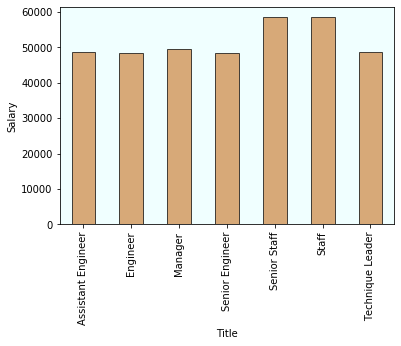

In [33]:
salaryvstitle = salary_mean_df.plot(kind='bar',
                                    x='Title',
                                    y='Salary', 
                                    color = 'peru',
                                    edgecolor='black', 
                                    alpha=.7, 
                                    legend = False)
salaryvstitle.set_xlabel('Title')
salaryvstitle.set_ylabel('Salary')
salaryvstitle.set_facecolor('azure')

salaryvstitle = salaryvstitle.get_figure()

salaryvstitle.savefig('Documents\GitHub\PewlettHackard\jupyter notebook graphs\salary-vs-title.png',bbox_inches="tight")

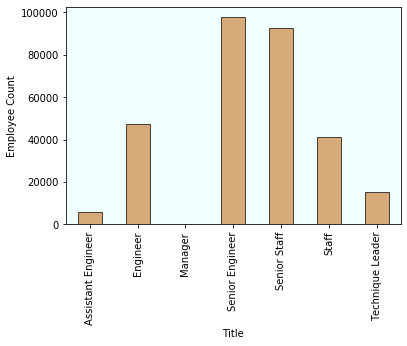

In [31]:
employee_vs_title = employee_title_mean_df.plot(kind='bar',x='Title',y='Employee Count', 
                                                color = 'peru',
                                                edgecolor='black', 
                                                alpha=.7, 
                                                legend = False)
employee_vs_title.set_xlabel('Title')
employee_vs_title.set_ylabel('Employee Count')
employee_vs_title.set_facecolor('azure')

employee_vs_title = employee_vs_title.get_figure()

employee_vs_title.savefig('Documents\GitHub\PewlettHackard\jupyter notebook graphs\employee-count.png', bbox_inches="tight")